In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Epoch-based models
byol = pd.read_csv('/kaggle/input/ssl-model-comparison/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/ssl-model-comparison/dino_ssl_rf_results_all_epochs.csv')
moco = pd.read_csv('/kaggle/input/ssl-model-comparison/moco_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/ssl-model-comparison/simclr_ssl_rf_results_all_epochs.csv')

# SSL and RF (final results only)
ssl = pd.read_csv('/kaggle/input/ssl-model-comparison/ssl_rf_results_all_epochs.csv')
rf = pd.read_csv('/kaggle/input/ssl-model-comparison/RF_model_results.csv')

In [4]:
def extract_best(df, model_name):
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = model_name
    return best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

byol_best = extract_best(byol, 'BYOL')
dino_best = extract_best(dino, 'DINO')
moco_best = extract_best(moco, 'MoCo')
simclr_best = extract_best(simclr, 'SimCLR')


/tmp/ipykernel_35/3077100923.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_35/3077100923.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_35/3077100923.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and

In [5]:
# SSL
ssl['model'] = 'SSL'
ssl = ssl[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

# RF
rf[['train_pct', 'test_pct']] = rf['Unnamed: 0'].str.split(':', expand=True).astype(int)
rf.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)
rf['model'] = 'RandomForest'
rf = rf[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

In [7]:
all_models = pd.concat([
    byol_best, dino_best, moco_best, simclr_best, ssl, rf
], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

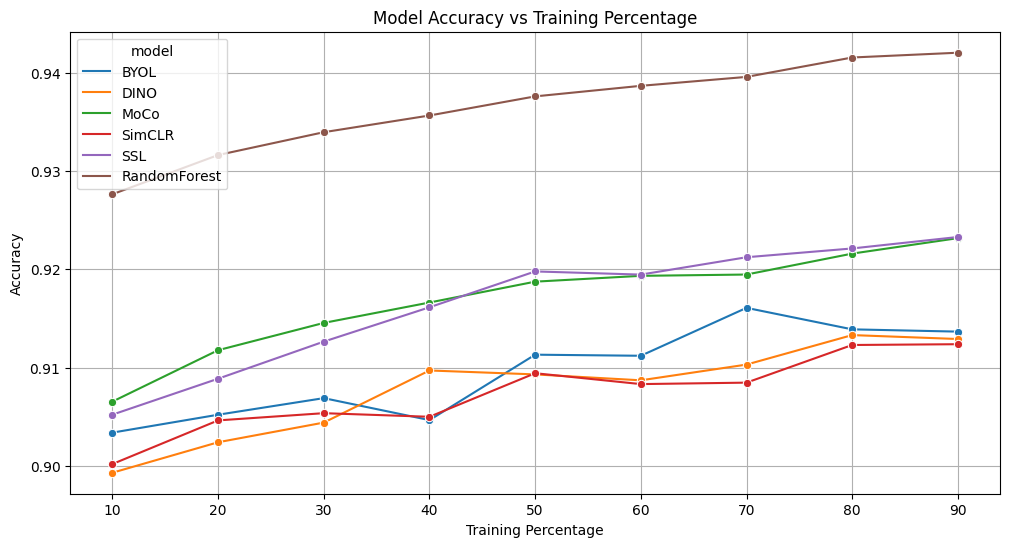

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=all_models, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title("Model Accuracy vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

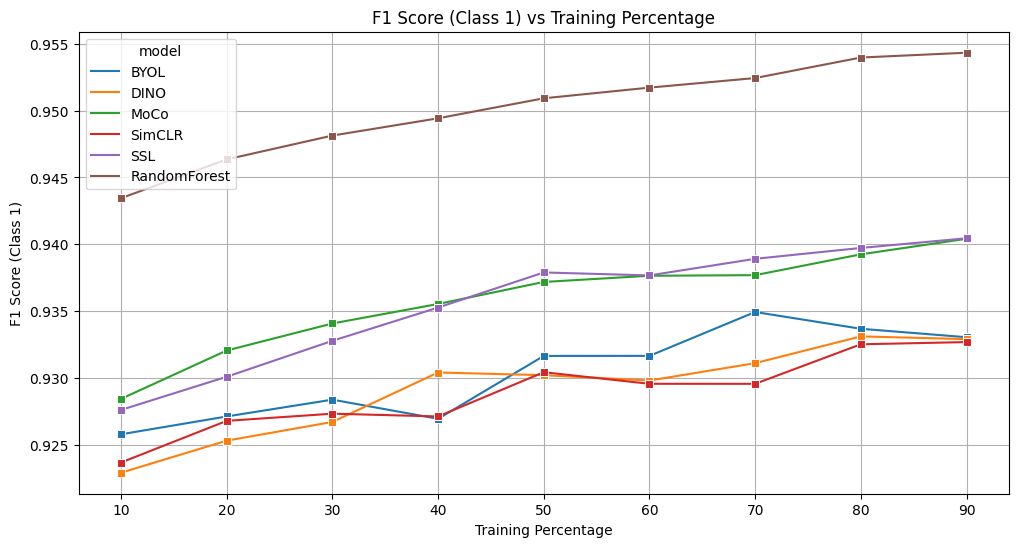

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(data=all_models, x='train_pct', y='f1_class_1', hue='model', marker='s')
plt.title("F1 Score (Class 1) vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("F1 Score (Class 1)")
plt.grid(True)
plt.show()

In [10]:
# Best model at 90:10
all_models[all_models['train_pct'] == 90].sort_values(by='accuracy', ascending=False)

,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
53,90.0,10.0,0.942021,0.920625,0.954331,RandomForest
44,90.0,10.0,0.923277,0.892197,0.940446,SSL
26,90.0,10.0,0.923161,0.891862,0.940408,MoCo
8,90.0,10.0,0.913653,0.878462,0.933040,BYOL
17,90.0,10.0,0.912900,0.876100,0.932900,DINO
35,90.0,10.0,0.912372,0.874528,0.932677,SimCLR


In [11]:
all_models.groupby('model')[['accuracy', 'f1_class_0', 'f1_class_1']].mean().sort_values(by='accuracy', ascending=False)

,accuracy,f1_class_0,f1_class_1
model,,,
RandomForest,0.936463,0.912624,0.950081
MoCo,0.916857,0.882040,0.935803
SSL,0.916519,0.881371,0.935594
BYOL,0.909581,0.871165,0.930346
DINO,0.907811,0.868089,0.929156
SimCLR,0.907335,0.867187,0.928844


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Model Accuracy vs Training Percentage')

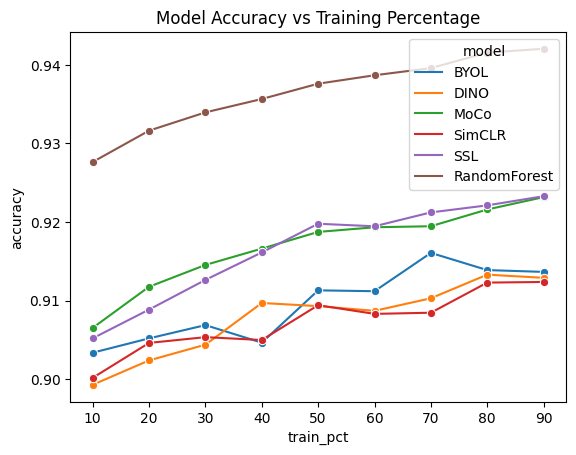

In [12]:
sns.lineplot(data=all_models, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title("Model Accuracy vs Training Percentage")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'F1 Score (Class 0) vs Training Percentage')

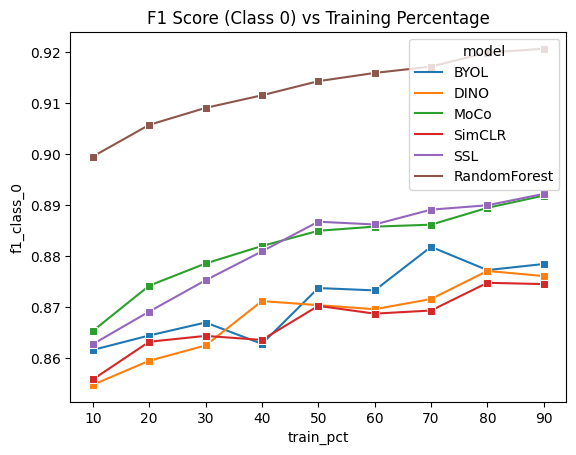

In [13]:
sns.lineplot(data=all_models, x='train_pct', y='f1_class_0', hue='model', marker='s')
plt.title("F1 Score (Class 0) vs Training Percentage")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'F1 Score (Class 1) vs Training Percentage')

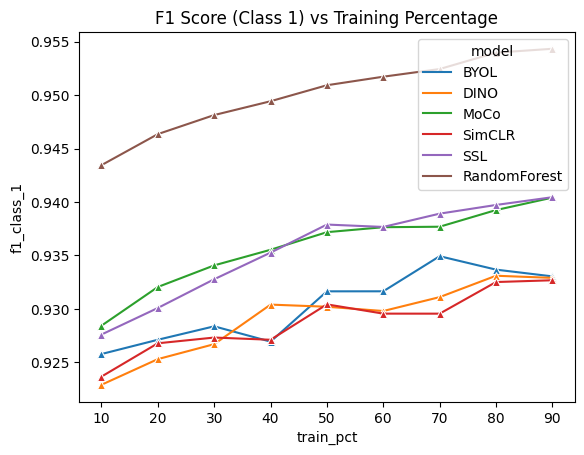

In [14]:
sns.lineplot(data=all_models, x='train_pct', y='f1_class_1', hue='model', marker='^')
plt.title("F1 Score (Class 1) vs Training Percentage")

In [15]:
summary_table = all_models.groupby('model')[
    ['accuracy', 'f1_class_0', 'f1_class_1']
].mean().sort_values(by='accuracy', ascending=False).round(4)

summary_table

,accuracy,f1_class_0,f1_class_1
model,,,
RandomForest,0.9365,0.9126,0.9501
MoCo,0.9169,0.8820,0.9358
SSL,0.9165,0.8814,0.9356
BYOL,0.9096,0.8712,0.9303
DINO,0.9078,0.8681,0.9292
SimCLR,0.9073,0.8672,0.9288


In [18]:
avg_metrics = all_models.groupby('model')[
    ['accuracy', 'f1_class_0', 'f1_class_1']
].mean().reset_index().round(4)

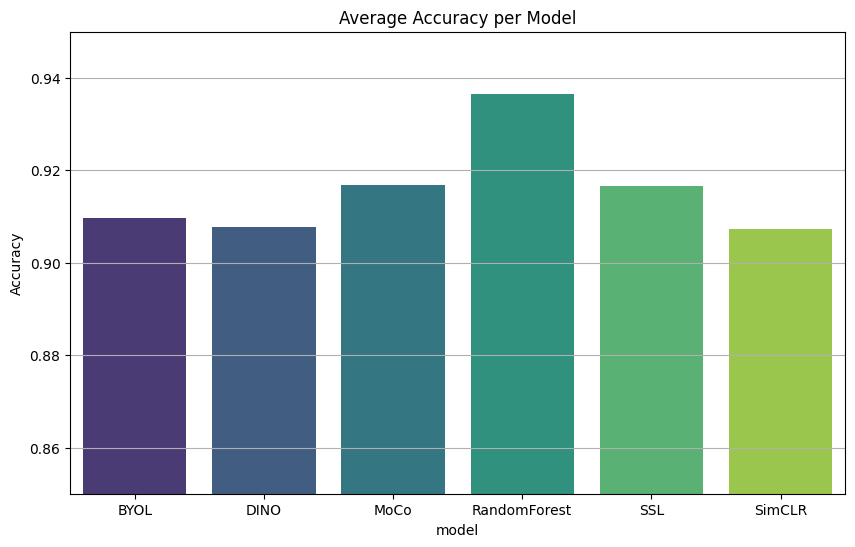

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_metrics, x='model', y='accuracy', palette='viridis')
plt.title("Average Accuracy per Model")
plt.ylabel("Accuracy")
plt.ylim(0.85, 0.95)  # adjust based on your range
plt.grid(axis='y')
plt.show()

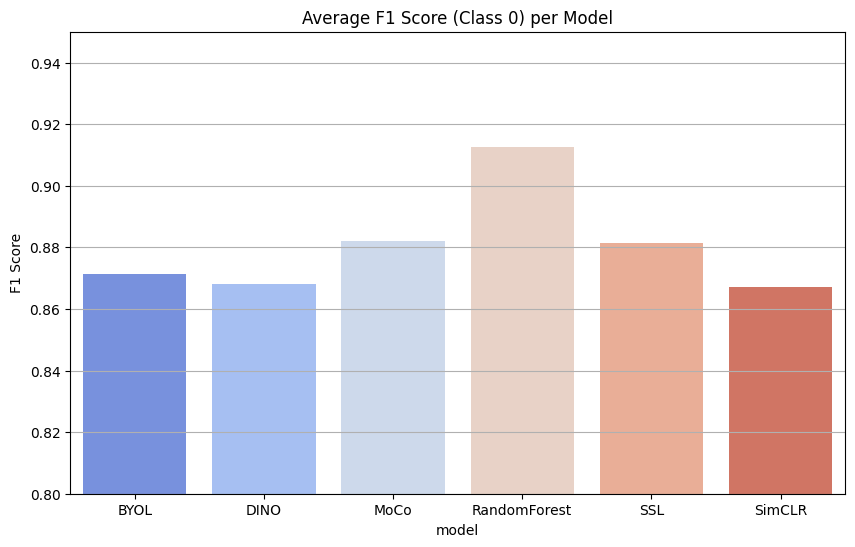

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_metrics, x='model', y='f1_class_0', palette='coolwarm')
plt.title("Average F1 Score (Class 0) per Model")
plt.ylabel("F1 Score")
plt.ylim(0.80, 0.95)
plt.grid(axis='y')
plt.show()

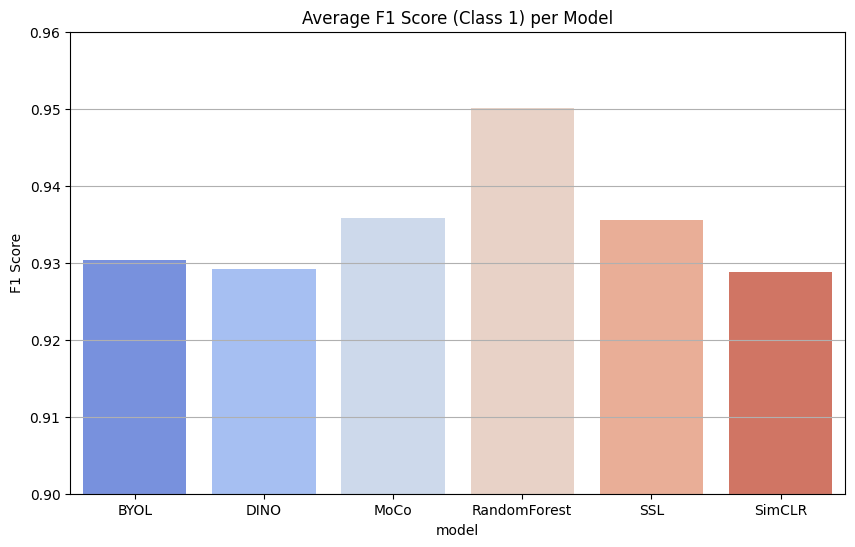

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_metrics, x='model', y='f1_class_1', palette='coolwarm')
plt.title("Average F1 Score (Class 1) per Model")
plt.ylabel("F1 Score")
plt.ylim(0.90, 0.96)
plt.grid(axis='y')
plt.show()

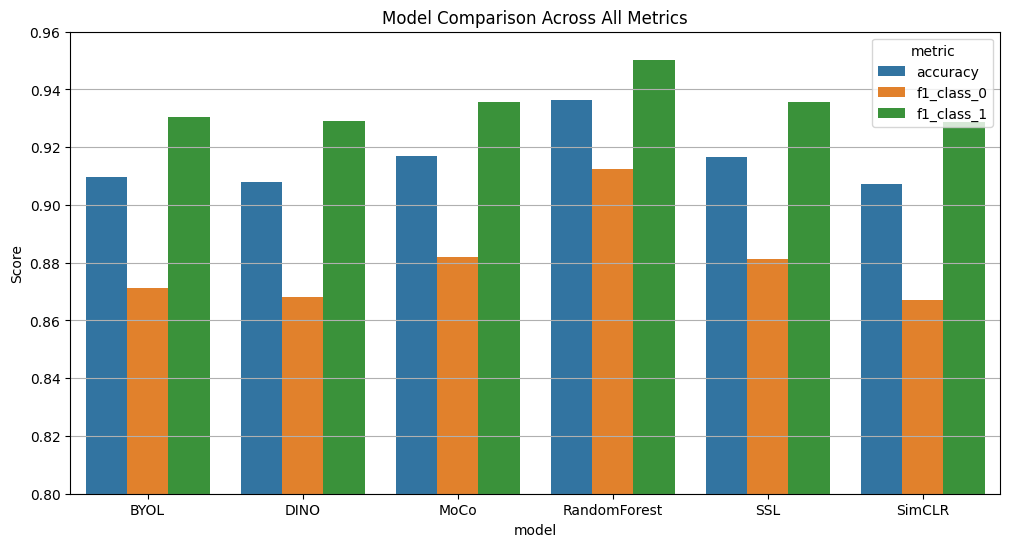

In [22]:
# Melt for grouped bar chart
melted = avg_metrics.melt(id_vars='model', var_name='metric', value_name='score')

plt.figure(figsize=(12,6))
sns.barplot(data=melted, x='model', y='score', hue='metric')
plt.title("Model Comparison Across All Metrics")
plt.ylabel("Score")
plt.ylim(0.80, 0.96)
plt.grid(axis='y')
plt.show()

Compare MoCo, DINO, BYOL, SimCLR (Final Epoch Only)

In [23]:
# Load files (adjust paths as per your Kaggle inputs)
byol = pd.read_csv('/kaggle/input/ssl-model-comparison/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/ssl-model-comparison/dino_ssl_rf_results_all_epochs.csv')
moco = pd.read_csv('/kaggle/input/ssl-model-comparison/moco_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/ssl-model-comparison/ssl_rf_results_all_epochs.csv')

In [24]:
def get_best_epoch(df, model_name):
    best = df.groupby(['train_pct', 'test_pct']).apply(lambda g: g.loc[g['accuracy'].idxmax()])
    best['model'] = model_name
    return best.reset_index(drop=True)[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

byol_best = get_best_epoch(byol, 'BYOL')
dino_best = get_best_epoch(dino, 'DINO')
moco_best = get_best_epoch(moco, 'MoCo')
simclr_best = get_best_epoch(simclr, 'SimCLR')

# Combine
focused_df = pd.concat([byol_best, dino_best, moco_best, simclr_best], ignore_index=True)

/tmp/ipykernel_35/482324908.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(lambda g: g.loc[g['accuracy'].idxmax()])
/tmp/ipykernel_35/482324908.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(lambda g: g.loc[g['accuracy'].idxmax()])
/tmp/ipykernel_35/482324908.py:2: DeprecationWarning: DataFrameGro

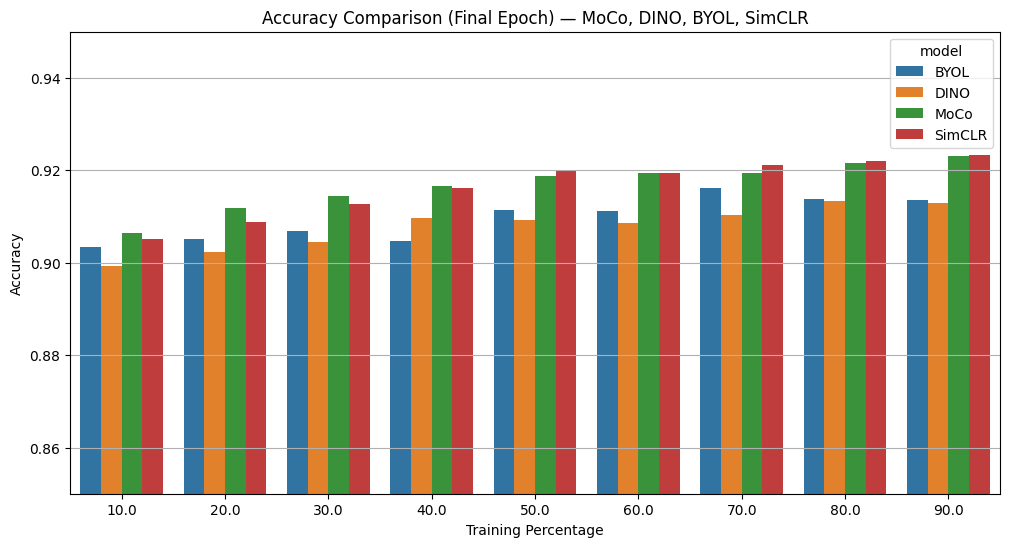

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=focused_df, x='train_pct', y='accuracy', hue='model')
plt.title("Accuracy Comparison (Final Epoch) — MoCo, DINO, BYOL, SimCLR")
plt.xlabel("Training Percentage")
plt.ylabel("Accuracy")
plt.ylim(0.85, 0.95)
plt.grid(axis='y')
plt.show()

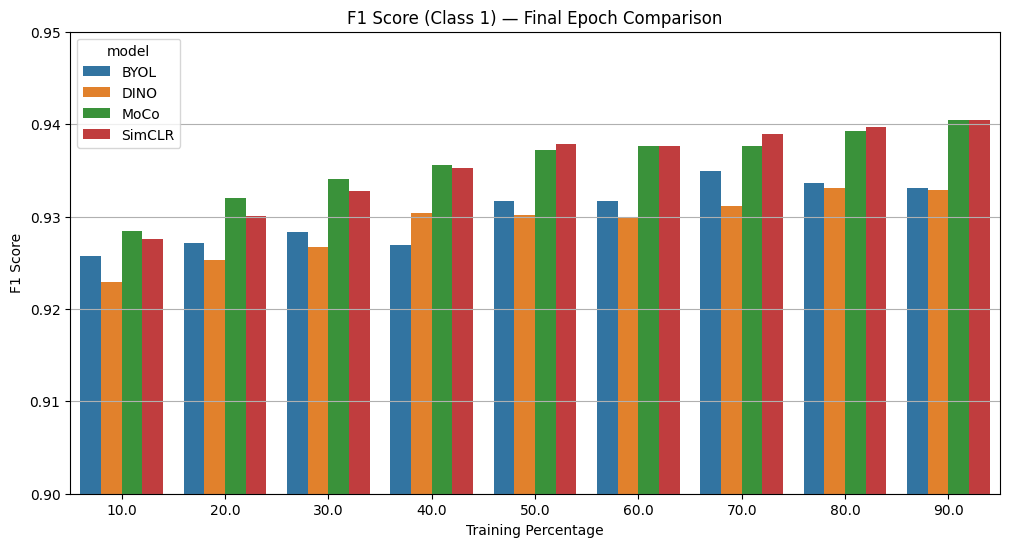

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(data=focused_df, x='train_pct', y='f1_class_1', hue='model')
plt.title("F1 Score (Class 1) — Final Epoch Comparison")
plt.xlabel("Training Percentage")
plt.ylabel("F1 Score")
plt.ylim(0.90, 0.95)
plt.grid(axis='y')
plt.show()

In [27]:
focused_df.sort_values(['train_pct', 'model'])

,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.903379,0.861625,0.925776,BYOL
9,10.0,90.0,0.899300,0.854800,0.922900,DINO
18,10.0,90.0,0.906535,0.865348,0.928428,MoCo
27,10.0,90.0,0.905207,0.862762,0.927600,SimCLR
1,20.0,80.0,0.905200,0.864454,0.927111,BYOL
10,20.0,80.0,0.902400,0.859500,0.925300,DINO
19,20.0,80.0,0.911763,0.874216,0.932048,MoCo
28,20.0,80.0,0.908862,0.869143,0.930084,SimCLR
2,30.0,70.0,0.906887,0.867001,0.928369,BYOL
11,30.0,70.0,0.904400,0.862500,0.926700,DINO


Epoch-wise Comparison (MoCo, DINO, BYOL, SimCLR)

In [28]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Step 2: Load the CSVs
byol = pd.read_csv('/kaggle/input/ssl-model-comparison/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/ssl-model-comparison/dino_ssl_rf_results_all_epochs.csv')
moco = pd.read_csv('/kaggle/input/ssl-model-comparison/moco_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/ssl-model-comparison/simclr_ssl_rf_results_all_epochs.csv')

# Step 3: Add model name to each
byol['model'] = 'BYOL'
dino['model'] = 'DINO'
moco['model'] = 'MoCo'
simclr['model'] = 'SimCLR'

# Step 4: Combine into one DataFrame
all_df = pd.concat([byol, dino, moco, simclr], ignore_index=True)
all_df = all_df[['train_pct', 'test_pct', 'epoch', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]


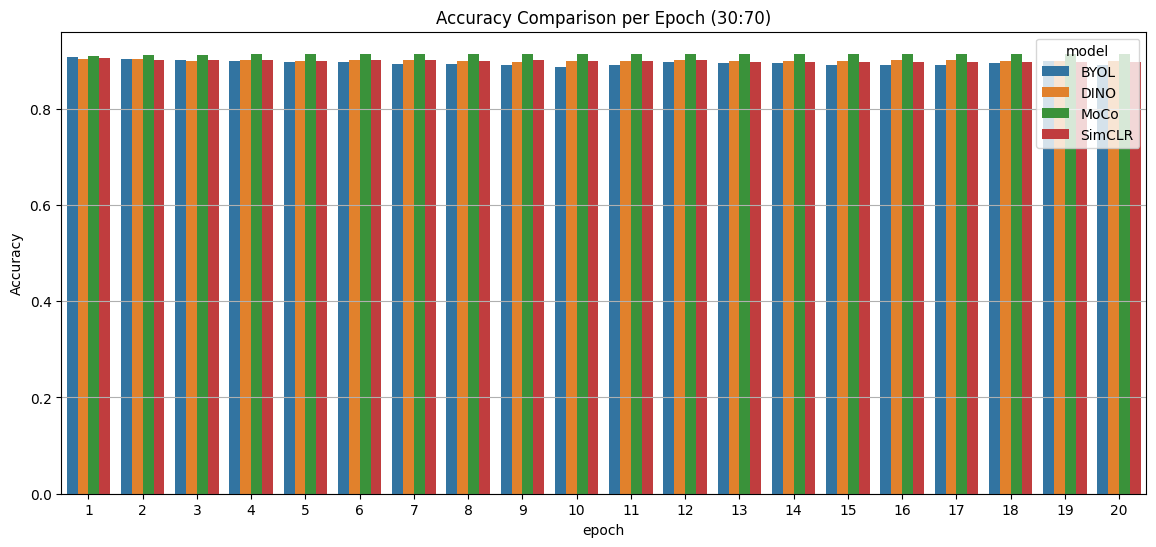

In [29]:
# Choose a train/test split to visualize
train_pct = 30
test_pct = 70

subset = all_df[(all_df['train_pct'] == train_pct) & (all_df['test_pct'] == test_pct)]

plt.figure(figsize=(14,6))
sns.barplot(data=subset, x='epoch', y='accuracy', hue='model')
plt.title(f'Accuracy Comparison per Epoch ({train_pct}:{test_pct})')
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()

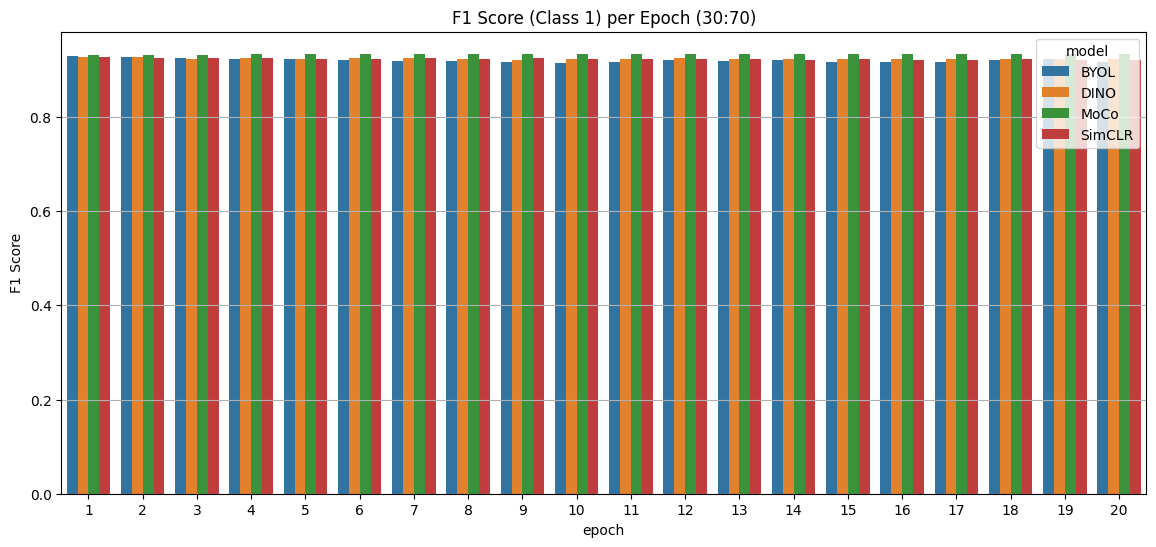

In [30]:
plt.figure(figsize=(14,6))
sns.barplot(data=subset, x='epoch', y='f1_class_1', hue='model')
plt.title(f'F1 Score (Class 1) per Epoch ({train_pct}:{test_pct})')
plt.ylabel("F1 Score")
plt.grid(axis='y')
plt.show()

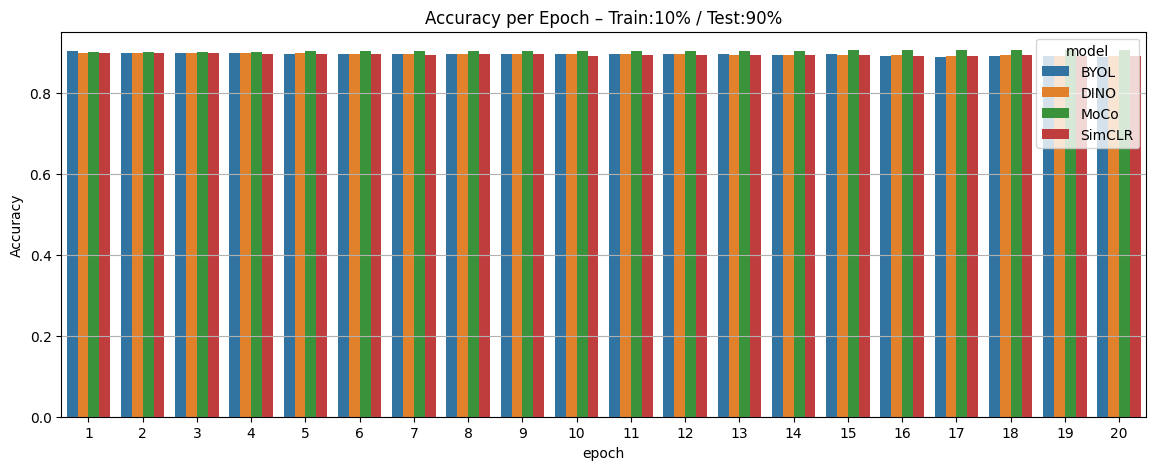

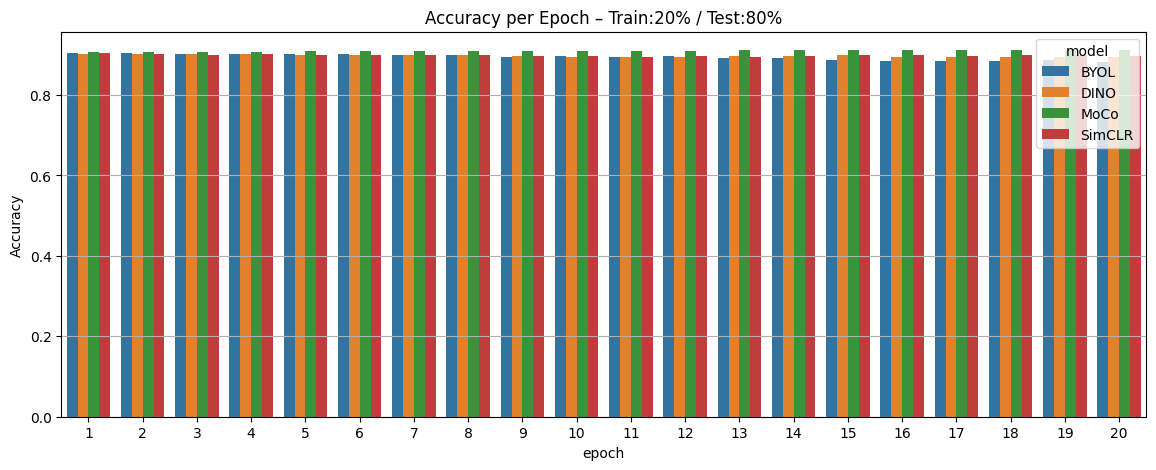

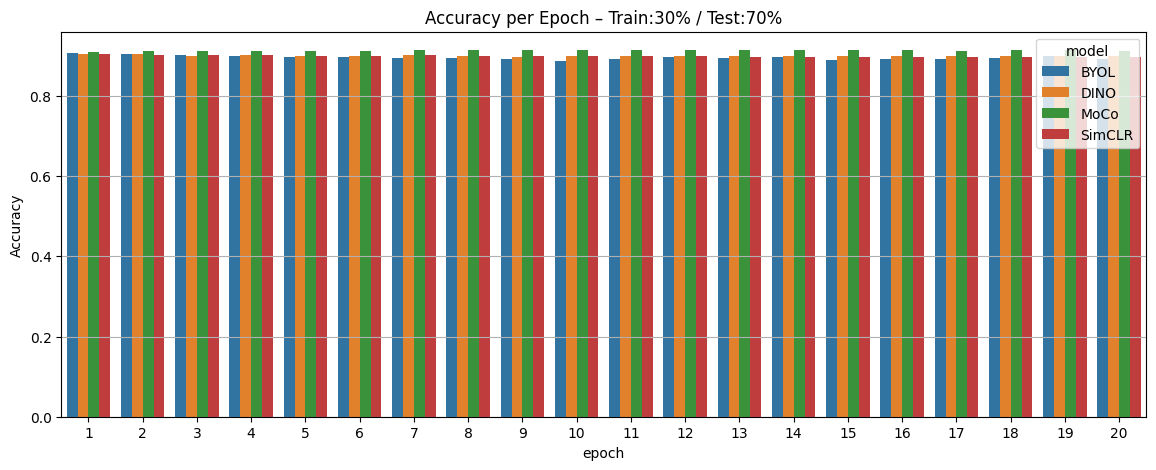

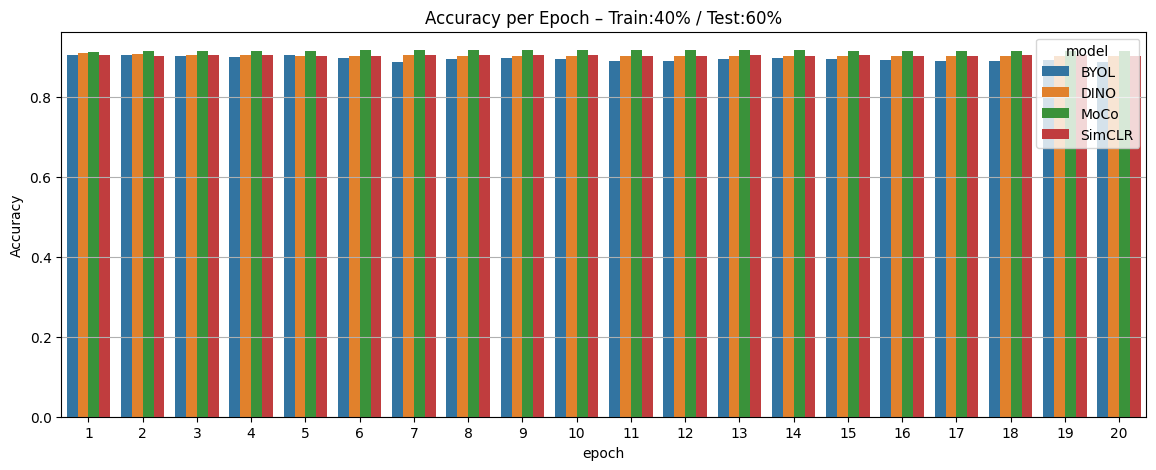

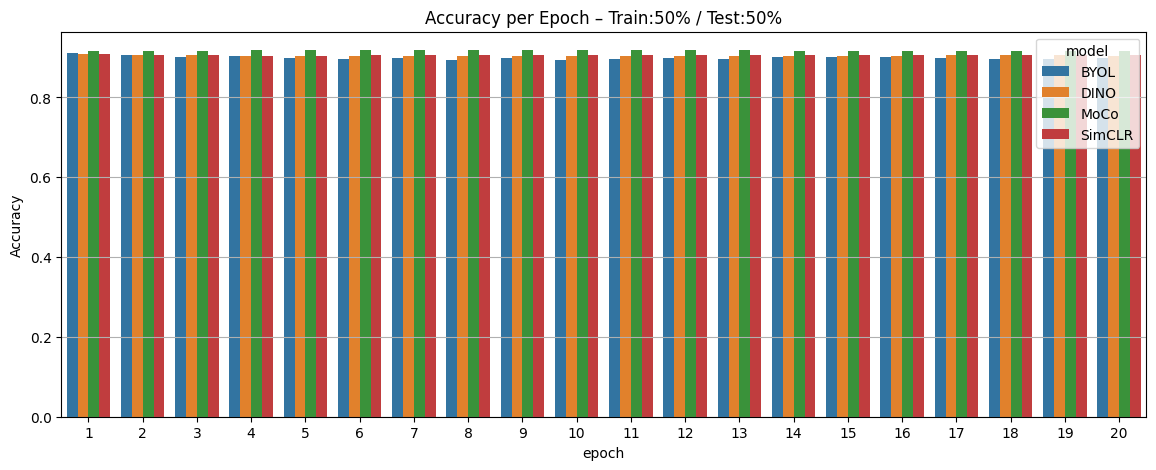

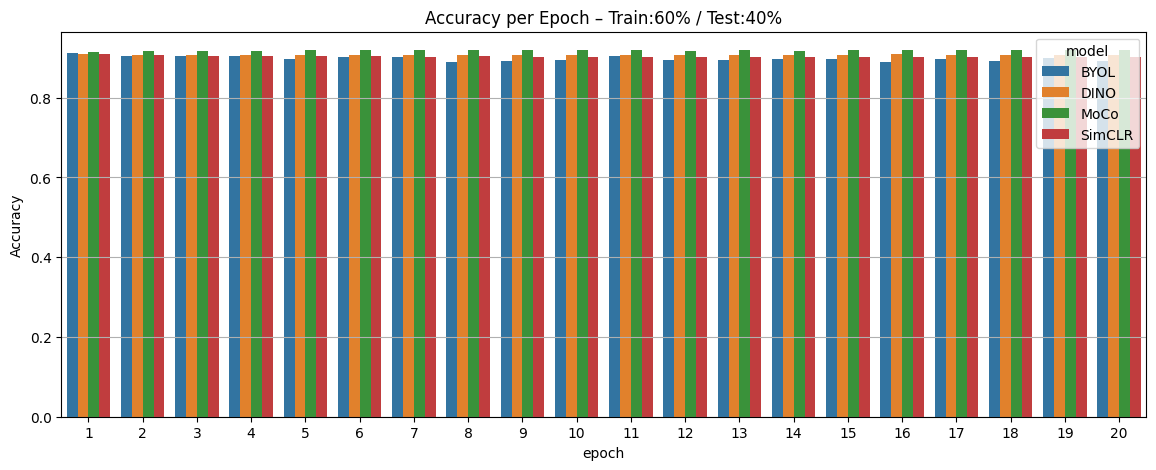

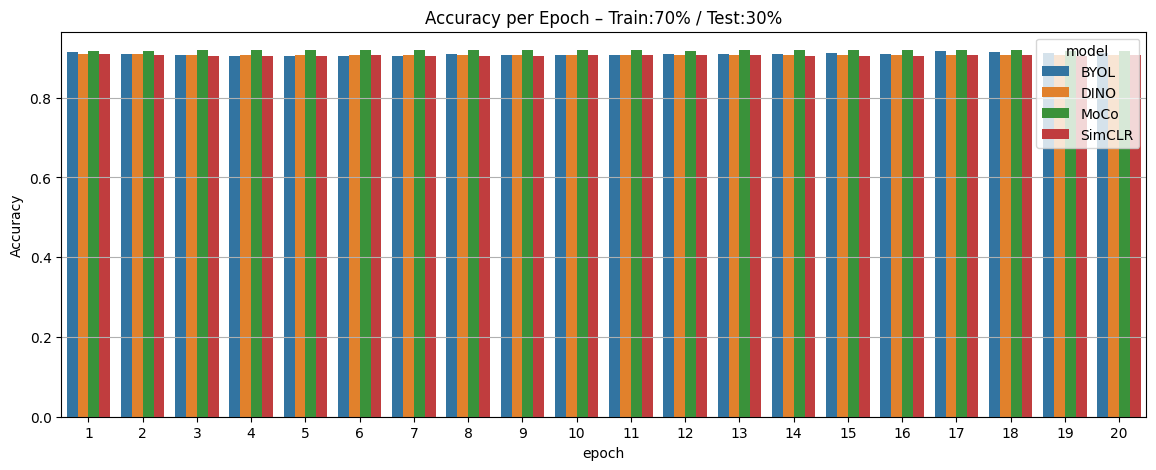

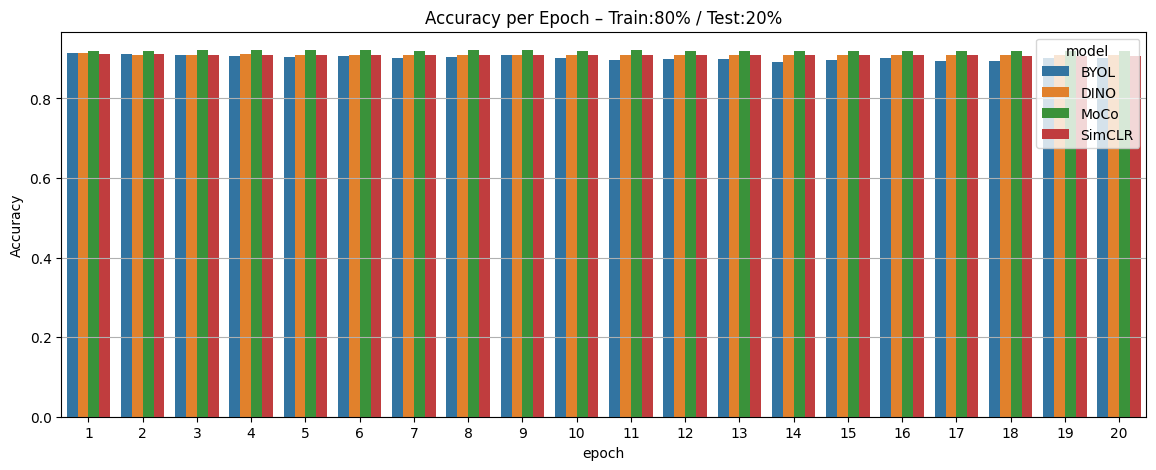

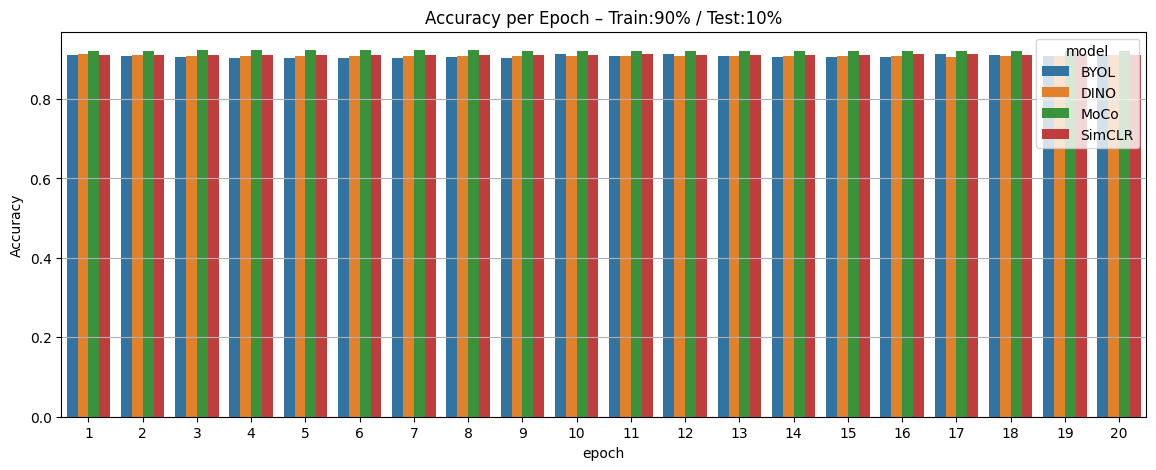

In [31]:
for ratio in all_df[['train_pct', 'test_pct']].drop_duplicates().values:
    train_pct, test_pct = ratio
    subset = all_df[(all_df['train_pct'] == train_pct) & (all_df['test_pct'] == test_pct)]
    
    plt.figure(figsize=(14,5))
    sns.barplot(data=subset, x='epoch', y='accuracy', hue='model')
    plt.title(f"Accuracy per Epoch – Train:{train_pct}% / Test:{test_pct}%")
    plt.ylabel("Accuracy")
    plt.grid(axis='y')
    plt.show()